In [58]:
import sys
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")

from utilities.corporate_design_colors_v4 import cmap, colors

In [59]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["font.size"] = 9
plt.rcParams["legend.fontsize"] = 8
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8

In [60]:
def Delta_of_T(T: NDArray[np.float64], T_C: float = 1.0, Delta_0: float = 1.0):
    Delta = np.where(T != 0, Delta_0 * np.tanh(1.74 * np.sqrt(T_C / T - 1)), 1.0)
    return Delta


T = np.linspace(0, 1, 101)

Delta = Delta_of_T(T)

/var/folders/kc/8fnzl3f94vxgl8w4wm3wfvk80000gn/T/ipykernel_57731/816220097.py:2: RuntimeWarning: divide by zero encountered in divide
  Delta = np.where(T != 0, Delta_0 * np.tanh(1.74 * np.sqrt(T_C / T - 1)), 1.0)


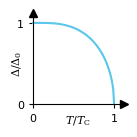

In [90]:
fig, ax = plt.subplots(figsize=(1.2, 1.2))

# Plot the simplified gap curve
ax.plot(T, Delta, color=colors(0), lw=1.5)
color = "k"  # colors(2)

# Remove frame
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)


# Keep only left and bottom spines, make them arrows
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_bounds(0, 1.1)
ax.spines["bottom"].set_bounds(0, 1.1)

ax.spines["bottom"].set_color(color)
ax.spines["left"].set_color(color)

# Draw arrow heads
ax.plot(
    1.12, 0.085, ">", color=color, transform=ax.get_xaxis_transform(), clip_on=False
)
ax.plot(
    0.085, 1.12, "^", color=color, transform=ax.get_yaxis_transform(), clip_on=False
)

# Simplify ticks
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color=color,
    labelcolor=color,
)

# Move axis labels near arrow tips
ax.text(0.4, -0.2, "$T/T_\\mathrm{C}$", ha="left", va="center", fontsize=8)
ax.text(
    -0.2,
    0.35,
    "$\\Delta/\\Delta_0$",
    ha="center",
    va="bottom",
    rotation=90,
    fontsize=8,
)

# Limits with little margins for arrows
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

ax.set_aspect("equal")
fig.tight_layout(pad=0.1)
plt.show()

In [91]:
fig.savefig("gap-suppression.pgf")
fig.savefig("gap-suppression.pdf")